# Анализ данных сервиса аренды самокатов GoFast

План работ:

1. Загрузка данных 
    - Импорт CSV-файлов с данными с помощью библиотеки pandas. 
    - Изучить общую информацию о каждом датафрейме.
2. Предобработка данных
    - Привести столбец date к типу даты pandas.
    - Создать новый столбец с номером месяца на основе столбца date.
    - Проверить наличие пропущенных значений и дубликатов в датафреймах. 
    - Обработать пропуски и дубликаты.
3. Описать и визуализировать общую информацию о пользователях и поездках:
    - частота встречаемости городов;
    - соотношение пользователей с подпиской и без подписки;
    - возраст пользователей;
    - расстояние, которое пользователь преодолел за одну поездку;
    - продолжительность поездок.
4. Объединить данные
    - Объединить данные о пользователях, поездках и подписках в один датафрейм. 
    - Создать ещё два датафрейма из датафрейма:
        - c данными о пользователях без подписки;
        - с данными о пользователях с подпиской.
    - Визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий.
5. Подсчитать выручку
    - Создать датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
    - Добавить столбец с помесячной выручкой, которую принёс каждый пользователь. 
6. Проверить гипотезы
    - Тратят ли пользователи с подпиской больше времени на поездки? 
    - Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
    - Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
    - Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?
    
7. Построить распределения
    - Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. 
        - Выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. 
        - Подобрать параметры распределения, описывающего эту ситуацию, построить график распределения
    - Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. 
        - Построить примерный график распределения
        - Оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.
8. Общий вывод

#### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats as st

In [2]:
users_df = pd.read_csv('/datasets/users_go.csv')
rides_df = pd.read_csv('/datasets/rides_go.csv')
subscriptions_df = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
users_df.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
rides_df.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [6]:
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


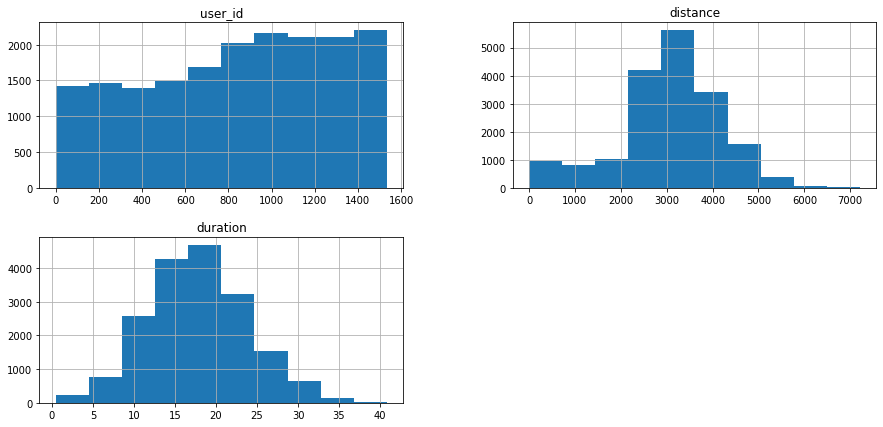

In [7]:
rides_df.hist(figsize=(15,7));

In [8]:
subscriptions_df.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [9]:
subscriptions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


##### Вывод

Были загружены три датафрейма: `users_go.csv`, `rides_go.csv`, `subscriptions_go.csv`

- пропусков в данных не обнаружено
- типы данных соответствуют предполагаемым значениям, за исключением столбца `'date'` в таблице о совершенных поездках - вместо datetime64 - object

#### Предобработка данных

In [10]:
rides_df.date = pd.to_datetime(rides_df.date, format='%Y-%m-%d')
rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [11]:
rides_df['year'] = rides_df.date.dt.year
rides_df['year'].value_counts()

2021    18068
Name: year, dtype: int64

In [12]:
del rides_df['year']

In [13]:
rides_df['month'] = rides_df.date.dt.month
rides_df.month.value_counts()

1     1585
5     1560
6     1553
3     1544
7     1529
12    1527
8     1518
9     1517
4     1506
10    1475
11    1418
2     1336
Name: month, dtype: int64

In [14]:
users_df.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [15]:
rides_df.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [16]:
users_df.duplicated().sum()

31

In [17]:
users_df[users_df.duplicated()].sort_values(by='name')

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,ultra
1545,807,Александр,28,Екатеринбург,free
1553,121,Алина,25,Пятигорск,ultra
1535,16,Амалия,27,Краснодар,ultra
1559,209,Андрей,23,Омск,ultra
1564,1045,Артемий,28,Ростов-на-Дону,free
1549,108,Влада,29,Тюмень,ultra
1557,611,Владимир,28,Омск,ultra
1543,153,Герман,23,Москва,ultra
1547,635,Герман,21,Москва,ultra


In [18]:
users_df.drop_duplicates(keep='first', inplace=True)
users_df.duplicated().sum()

0

In [19]:
rides_df[rides_df.duplicated()]

,user_id,distance,duration,date,month


##### Выводы
Все записи о поездках за 2021 год.
Данные без пропусков, в записях о пользователях встретилось небольшое число полных дубликатов. 

#### Исследовательский анализ данных

In [20]:
users_df.describe()

,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000


- всего имеем записи о 1534 пользователях и 18068 поездках
- средний возраст среди пользователей - 25 лет, минимальный - 12, максимальный - 43

Посмотрим распределение пользователей по городам.

In [21]:
users_df.city.value_counts(ascending=True)

Москва            168
Тюмень            180
Омск              183
Сочи              189
Краснодар         193
Ростов-на-Дону    198
Екатеринбург      204
Пятигорск         219
Name: city, dtype: int64

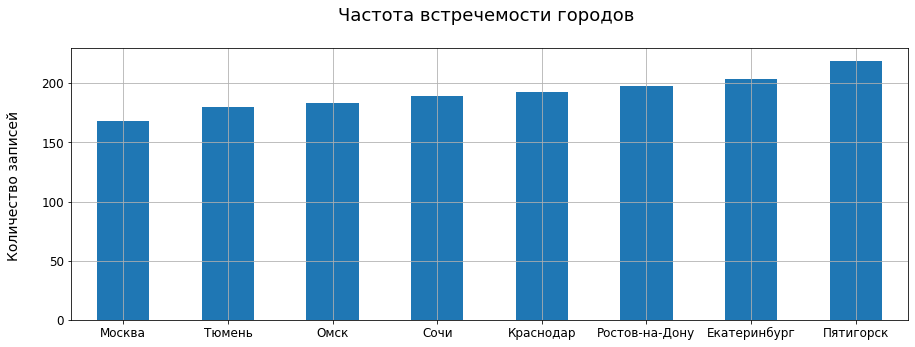

In [22]:
users_df.city.value_counts(ascending=True).plot(kind='bar', 
                                                figsize=(15,5),
                                                rot=0,
                                                fontsize=12,
                                                grid=True).set_title('Частота встречемости городов \n', fontsize=18)
plt.ylabel('Количество записей \n', fontsize=14);

- больше всего пользователей из Пятигорска, меньше - из Москвы

Рассмотрим количество пользователей с подпиской и без.

In [23]:
users_df.subscription_type.value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

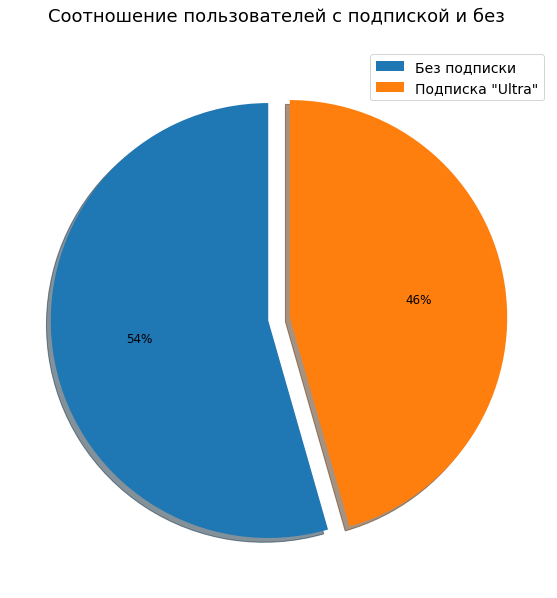

In [24]:
users_df.subscription_type.value_counts().plot(kind='pie',
                                               figsize=(15,10),
                                               autopct='%1.0f%%',
                                               rot=0,
                                               fontsize=12,
                                               legend=True,
                                               labeldistance=None,
                                               shadow=True,
                                               explode=[0.05, 0.05],
                                               startangle=90,
                                               grid=True).set_title('Соотношение пользователей c подпиской и без \n',
                                                                    fontsize=18);
plt.legend(['Без подписки','Подписка "Ultra"'], prop={'size': 14}, loc='upper right')
plt.ylabel('');

- пользователей без подписки - 54%, с подпиской - 46%

Посмотрим на распределение возраста пользователей.

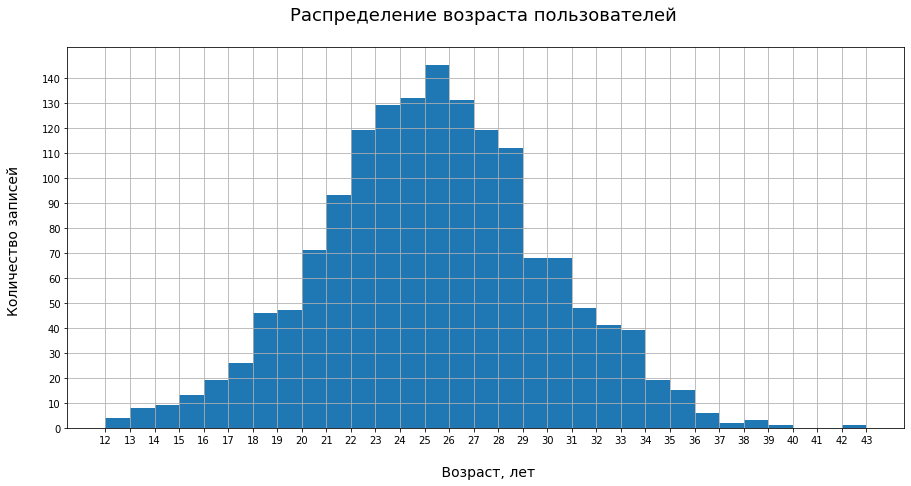

In [25]:
users_df.age.hist(bins=31, figsize=(15,7), range=(12, 43)).set_title('Распределение возраста пользователей \n', fontsize=18)
plt.xlabel('\n Возраст, лет', fontsize=14)
plt.ylabel('Количество записей \n', fontsize=14)
plt.xticks(range(12, 44, 1))
plt.yticks(range(0, 150, 10));

- чаще встречающийся возраст среди пользователей - 25 лет, минимальный - 12, максимальный - 43

Рассмотрим записи о поездках, расстоянии однной поездки.

In [26]:
rides_df.describe()

,user_id,distance,duration,month
count,18068.000000,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011,6.486772
std,434.734317,1116.831209,6.091051,3.437410
min,1.000000,0.855683,0.500000,1.000000
25%,487.000000,2543.226360,13.597563,4.000000
50%,889.000000,3133.609994,17.678395,6.000000
75%,1213.250000,3776.222735,21.724800,9.000000
max,1534.000000,7211.007745,40.823963,12.000000


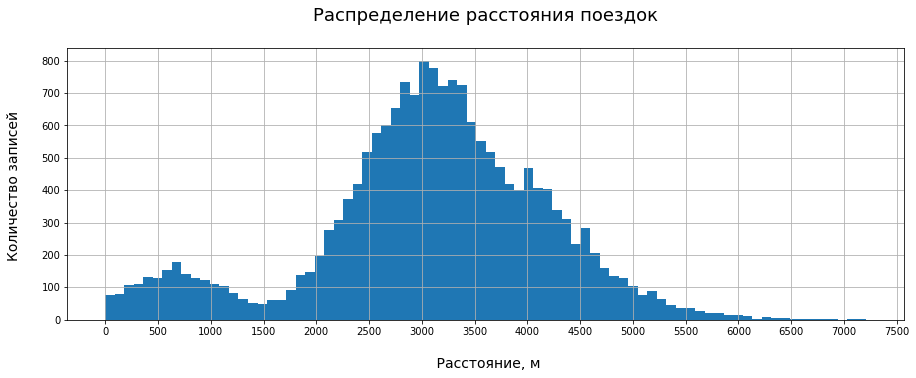

In [27]:
rides_df.distance.hist(bins=80, figsize=(15,5)).set_title('Распределение расстояния поездок\n', fontsize=18)
plt.xlabel('\n Расстояние, м', fontsize=14)
plt.ylabel('Количество записей \n', fontsize=14)
plt.xticks(range(0, 8000, 500));

- медианное расстояние поездки - 3133 метра, минимальное - 85 сантиметров, максимальное - 7211 метров

На гистограмме видим два пика - около 700м и 3000м. Рассмотрим первый пик подробнее.

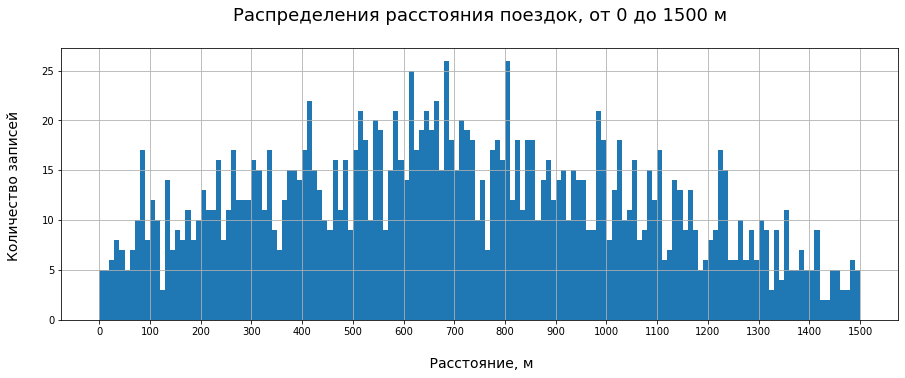

In [28]:
rides_df.distance.hist(bins=150, 
                       figsize=(15,5), 
                       range=(0, 1500)).set_title('Распределения расстояния поездок, от 0 до 1500 м\n', fontsize=18)
plt.xlabel('\n Расстояние, м', fontsize=14)
plt.ylabel('Количество записей \n', fontsize=14)
plt.xticks(range(0, 1600, 100));

Вероятно, что есть относительно небольшое число пользователей которые пользуются самокатами для поездок на короткие расстояния (от дома до остановок общественно транспорта например).

Посмотрим на длительность поездок.

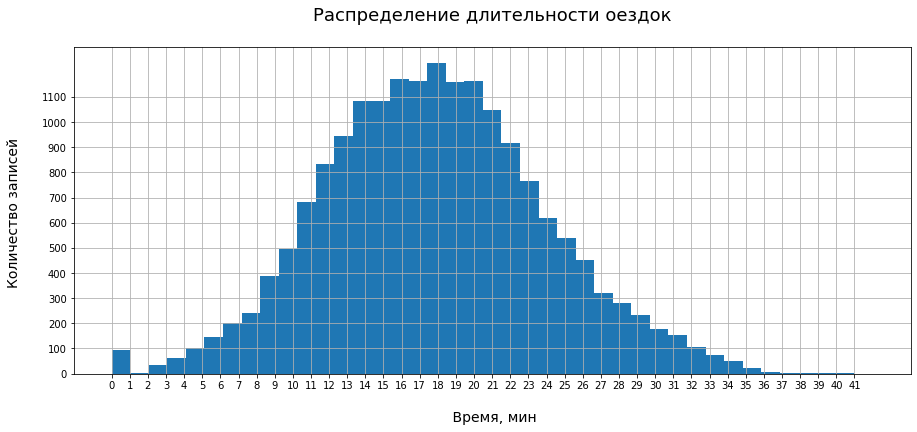

In [29]:
rides_df.duration.hist(bins=41, range=(0,42), figsize=(15,6)).set_title('Распределение длительности оездок\n', fontsize=18)
plt.xlabel('\n Время, мин', fontsize=14)
plt.ylabel('Количество записей \n', fontsize=14)
plt.xticks(range(0, 42, 1))
plt.yticks(range(0, 1200, 100));

In [30]:
rides_df[rides_df.duration <= 1].head()

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2


In [31]:
rides_df[rides_df.duration <= 1].describe()

,user_id,distance,duration,month
count,95.000000,95.000000,95.0,95.000000
mean,1092.210526,5113.176549,0.5,6.484211
std,244.028551,658.254104,0.0,3.709858
min,701.000000,4030.308008,0.5,1.000000
25%,901.000000,4611.510820,0.5,3.000000
50%,1069.000000,5052.769411,0.5,6.000000
75%,1310.500000,5488.459099,0.5,10.000000
max,1524.000000,7211.007745,0.5,12.000000


##### Выводы
При первом рассмотрении можно наблюдать:

- всего имеем записи о 1534 пользователях и 18068 поездках
- больше всего пользователей из Пятигорска, меньше - из Москвы
- чаще встречающийся возраст среди пользователей - 25 лет, минимальный - 12, максимальный - 43
- на графике расстояния видно две вершины около 700 м и 3000 м, вероятно есть отдельная категория пользователей, которые предпринимают относительно короткие поездки
- медианное расстояние поездки - 3133 метра, минимальное - 85 сантиметров, максимальное - 7211 метров
- среднее время поездки - 17 мин, минимальное - 6 мин, максимальное 41 мин
- есть 95 записей с аномально коротким временем поездки до 30 секунд. Однако, если посмотреть на расстояние, то становится понятно, что пользователь явно не мог проехать от 4 до 7 км за 30 секунд. Вероятно, поездка не была завершена должным образом. В то же время данные других столбцов ещё можно использовать, как и наличие самих этих записей (ведь если тариф был free, то пользователь в любом случае заплатил 50 руб.), поэтому оставим их как есть.  
- пользователей без подписки - 54%, с подпиской - 46%

#### Объединение данных

In [32]:
df = users_df.merge(rides_df, on='user_id', suffixes=(False, False))
df = df.merge(subscriptions_df, on='subscription_type', suffixes=(False, False))
df['distance'] = df['distance'].round(2)
df['duration'] = np.ceil(df['duration'])
df.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27.0,2021-08-28,8,6,0,199


In [33]:
df.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [34]:
ultra_df = df[df['subscription_type'] == 'ultra']
ultra_df.describe().round(2)

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,6500.00,6500.00,6500.00,6500.00,6500.00,6500.0,6500.0,6500.0
mean,348.73,24.89,3115.45,19.04,6.42,6.0,0.0,199.0
std,201.10,4.76,836.90,5.58,3.41,0.0,0.0,0.0
min,1.00,12.00,244.21,4.00,1.00,6.0,0.0,199.0
25%,175.00,22.00,2785.45,15.00,4.00,6.0,0.0,199.0
50%,351.00,25.00,3148.64,19.00,6.00,6.0,0.0,199.0
75%,525.00,28.00,3560.58,22.00,9.00,6.0,0.0,199.0
max,699.00,38.00,5699.77,41.00,12.00,6.0,0.0,199.0


In [35]:
free_df = df[df['subscription_type'] == 'free']
free_df.describe().round(2)

,user_id,age,distance,duration,month,minute_price,start_ride_price,subscription_fee
count,11568.00,11568.00,11568.00,11568.00,11568.00,11568.0,11568.0,11568.0
mean,1120.53,24.89,3045.50,17.89,6.52,8.0,50.0,0.0
std,241.17,4.48,1246.17,6.33,3.45,0.0,0.0,0.0
min,700.00,12.00,0.86,1.00,1.00,8.0,50.0,0.0
25%,915.00,22.00,2366.56,13.00,4.00,8.0,50.0,0.0
50%,1123.00,25.00,3114.65,18.00,7.00,8.0,50.0,0.0
75%,1328.00,28.00,3905.70,22.00,9.00,8.0,50.0,0.0
max,1534.00,43.00,7211.01,35.00,12.00,8.0,50.0,0.0


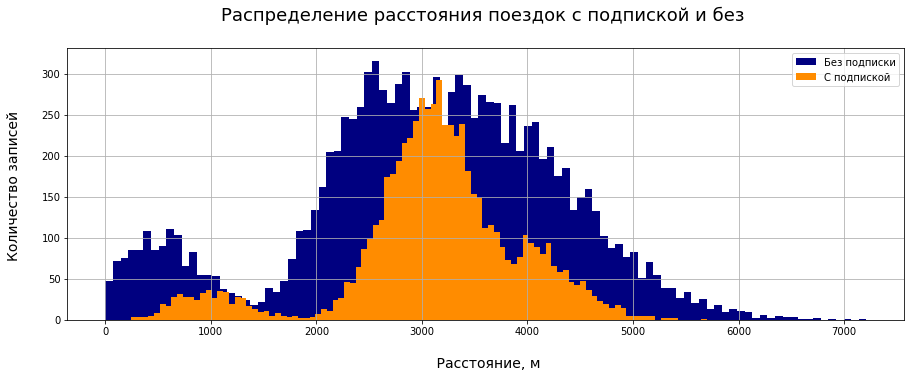

In [36]:
free_df.distance.hist(bins=100, figsize=(15,5), label='Без подписки', color='navy')
ultra_df.distance.hist(bins=100,
                       figsize=(15,5), 
                       label='C подпиской', 
                       color='darkorange').set_title('Распределение расстояния поездок c подпиской и без \n', fontsize=18)

plt.legend()
plt.xlabel('\n Расстояние, м', fontsize=14)
plt.ylabel('Количество записей \n', fontsize=14);

Text(0, 0.5, 'Количество записей \n')

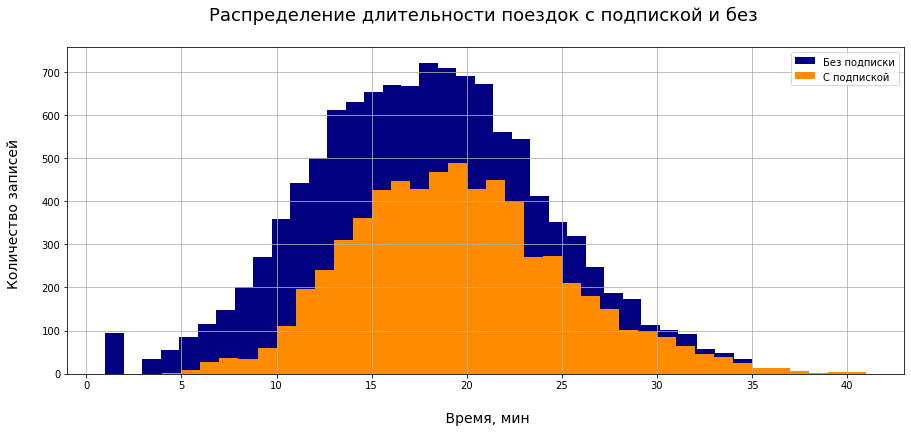

In [37]:
free_df.duration.hist(bins=35, figsize=(15,6), label='Без подписки', color='navy')

ultra_df.duration.hist(bins=38,
                       range=(3,41), 
                       figsize=(15,6),
                       label='C подпиской', 
                       color='darkorange').set_title('Распределение длительности поездок c подпиской и без \n', fontsize=18)

plt.legend()
plt.xlabel('\n Время, мин', fontsize=14)
plt.ylabel('Количество записей \n', fontsize=14)

In [38]:
table = df.groupby('subscription_type', as_index=False).agg({'distance': ['count','min','mean','median', 'max'],
                                     'duration': ['count','min','mean','median', 'max']})
table.columns = ['_'.join(col).rstrip('_') for col in table.columns.values]
table

,subscription_type,distance_count,distance_min,distance_mean,distance_median,distance_max,duration_count,duration_min,duration_mean,duration_median,duration_max
0,free,11568,0.86,3045.495284,3114.65,7211.01,11568,1.0,17.890992,18.0,35.0
1,ultra,6500,244.21,3115.445431,3148.64,5699.77,6500,4.0,19.037692,19.0,41.0


##### Выводы

По данным из графиков и таблиц можем наблюдать:
- количество пользователей с подпиской - 6500, без - 11568, одна выборка больше другой почти вдвое
- пользователи с подпиской в среднем проезжают примерно такое же расстояние, сколько и без.
- в тоже время, максимальные и минимальные длины поездок отличаются значительно - у пользователей с подпиской больше минимальное расстояние поездки, у пользователей без подписки - максимальное.
- у пользователей с подпиской в среднем больше время поездки
- аномальные значения в столбце длительности поездки относятся к пользователям без подписки

#### Подсчёт выручки

In [39]:
revenue_df = df.groupby(['user_id', 'month'], as_index=False).agg({'distance': ['count','sum'], 'duration': ['sum']})
revenue_df.columns = ['_'.join(col).rstrip('_') for col in revenue_df.columns.values]
revenue_df = revenue_df.rename(columns={"distance_count": "ride_count"})
revenue_df = revenue_df.merge(users_df[['user_id', 'subscription_type', 'city']], on='user_id')
revenue_df = revenue_df.merge(subscriptions_df, on='subscription_type')
revenue_df

,user_id,month,ride_count,distance_sum,duration_sum,subscription_type,city,minute_price,start_ride_price,subscription_fee
0,1,1,2,7027.51,42.0,ultra,Тюмень,6,0,199
1,1,4,1,754.16,7.0,ultra,Тюмень,6,0,199
2,1,8,2,6723.47,46.0,ultra,Тюмень,6,0,199
3,1,10,2,5809.91,32.0,ultra,Тюмень,6,0,199
4,1,11,3,7003.50,56.0,ultra,Тюмень,6,0,199
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,2,3409.47,26.0,free,Краснодар,8,50,0
11327,1534,8,2,7622.45,48.0,free,Краснодар,8,50,0
11328,1534,9,1,4928.17,23.0,free,Краснодар,8,50,0
11329,1534,11,4,13350.02,78.0,free,Краснодар,8,50,0


In [40]:
#Помесячная выручка считается по формуле: 
# стоимость старта поездки × количество поездок
# + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах 
# + стоимость подписки

revenue_df['month_revenue'] = revenue_df['duration_sum'] * revenue_df['minute_price'] + \
                              revenue_df['start_ride_price'] * revenue_df['ride_count'] + revenue_df['subscription_fee']  

In [41]:
revenue_df.month_revenue.isna().sum()

0

In [42]:
revenue_df.month_revenue.describe()

count    11331.000000
mean       342.303504
std        153.875346
min         58.000000
25%        234.000000
50%        319.000000
75%        415.000000
max       1444.000000
Name: month_revenue, dtype: float64

Посчитаем общую сумму выручки и по типам подписки 

In [43]:
revenue_df.month_revenue.sum()

3878641.0

In [44]:
revenue_df.groupby('subscription_type').agg(['sum','min','mean', 'median', 'max'])['month_revenue']

,sum,min,mean,median,max
subscription_type,,,,,
free,2234104.0,58.0,328.641365,274.0,1444.0
ultra,1644537.0,223.0,362.792191,337.0,955.0


Посмотрим на распределение выручки по городам и месяцам

In [45]:
revenue_df.groupby('city').sum()['month_revenue'].sort_values()

city
Москва            408749.0
Омск              449416.0
Тюмень            458673.0
Сочи              481337.0
Краснодар         489445.0
Ростов-на-Дону    520328.0
Екатеринбург      529991.0
Пятигорск         540702.0
Name: month_revenue, dtype: float64

In [46]:
revenue_df.groupby('month').sum()['month_revenue']

month
1     337958.0
2     290428.0
3     329822.0
4     322916.0
5     337265.0
6     335978.0
7     328504.0
8     325650.0
9     323037.0
10    315360.0
11    305622.0
12    326101.0
Name: month_revenue, dtype: float64

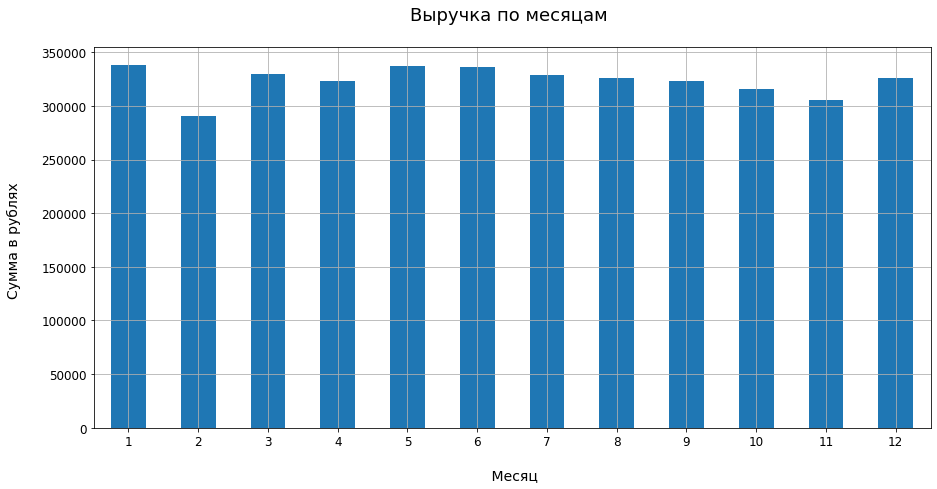

In [47]:
revenue_df.groupby('month').sum()['month_revenue'].plot(kind='bar', 
                                                        figsize=(15,7), 
                                                        rot=0, 
                                                        fontsize=12, 
                                                        grid=True).set_title('Выручка по месяцам \n', fontsize=18)
plt.ylabel('Сумма в рублях \n', fontsize=14);
plt.xlabel('\n Месяц', fontsize=14);

Рассмотрим количество поездок по месяцам

In [48]:
revenue_df.groupby('month').sum()['ride_count']

month
1     1585
2     1336
3     1544
4     1506
5     1560
6     1553
7     1529
8     1518
9     1517
10    1475
11    1418
12    1527
Name: ride_count, dtype: int64

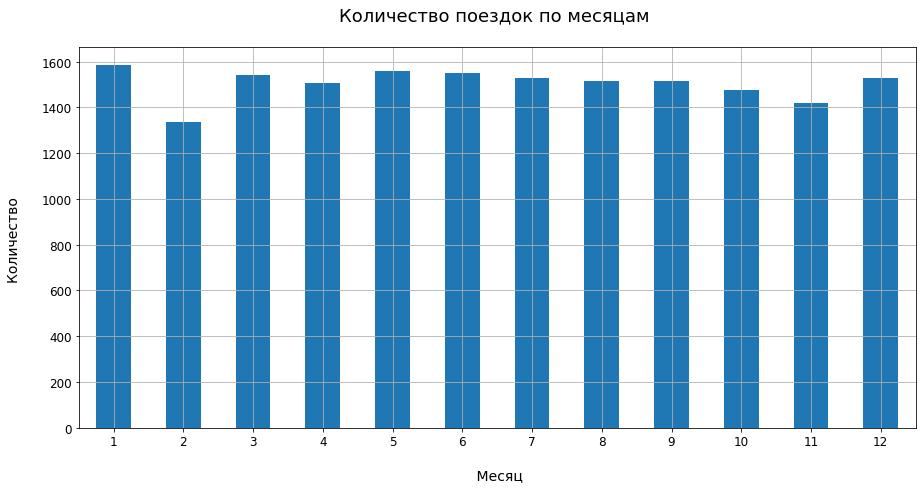

In [49]:
revenue_df.groupby('month').sum()['ride_count'].plot(kind='bar', 
                                                        figsize=(15,7), 
                                                        rot=0, 
                                                        fontsize=12, 
                                                        grid=True).set_title('Количество поездок по месяцам \n', fontsize=18)
plt.ylabel('Количество \n', fontsize=14);
plt.xlabel('\n Месяц', fontsize=14);

##### Выводы

Результаты агрегации дали следующие результаты: 
- общая сумма выручки 3878641 руб.
- пользователи без подписки минимально принесли выручки - 58.0 руб, в среднем - 328.64 руб, медиана - 274.0 руб, максимально - 1444.0 руб., всего 2234104 руб. или 57.7% от общего числа
- пользователи с подпиской 'ultra' минимально принесли выручки 223.0 в среднем - 362.79, медиана - 337.0 руб, максимально - 955.0 руб., всего 1644537 руб. или 42.3% от общего числа
- при этом стоит помнить, что пользователей без подписки почти вдвое больше пользователей с подпиской
- наиболее прибыльный месяц - январь, наименее прибыльный - февраль
- в эти же месяцы совершены наибольшее и наименьшее число поездок
- наиболее прибыльным оказался Пятигорск, наименее прибыльной - Москва

Распределение прибыли и поездок по месяцам выглядят несколько странно для сервиса аренды самокатов. 

#### Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки?

Нам уже известно, что в среднем, пользователи с подпиской ездят на самокате дольше, однако насколько значима разница?

Необходимо выяснить, является ли истинное среднее ген. совокупности пользователей с подпиской равным истинному среднему ген. совокупности пользователей без подписки. Нулевая гипотеза - истинные средние равны, альтернативная - среднее время с подпиской больше

Для проверки используем t-тест c equal_var=False, т.к. размеры выборок различаются почти вдвое. 

In [50]:
alpha = 0.05
result = st.ttest_ind(ultra_df.duration, free_df.duration, equal_var=False, alternative='greater')

print(result.pvalue)
if result.pvalue < alpha: 
     print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

1.1814679253701353e-36
Отвергаем нулевую гипотезу


Как видно из проведенного теста, разница в средних значениях неслучайна и пользователи с подпиской скорее всего будут предпринимать более длительные поездки.

##### Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Применим t-тест и сравним среднее расстояние поездки пользователей с числом 3130. Нулевая гипотеза - среднее расстояние одной поездки пользователя с подпиской равно 3130, альтернативная - путь за одну поездку больше 3130. 

In [51]:
value = 3130

result = st.ttest_1samp(ultra_df.distance, value, alternative='greater')

print(result.pvalue)
if result.pvalue < alpha: 
     print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

0.9195362605842414
Не получилось отвергнуть нулевую гипотезу


Таким образом, вероятнее всего, что за одно поездку пользователь с подпиской продет около 3130 метров.

##### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки ?

Нулевая гипотеза - средняя выручка по месяцам одинакова, альтернативная - выручка от пользователй с подпиской больше.

In [52]:
revenue_ultra = revenue_df[revenue_df['subscription_type'] == 'ultra'].month_revenue
revenue_free = revenue_df[revenue_df['subscription_type'] == 'free'].month_revenue

alpha = 0.05
result = st.ttest_ind(revenue_ultra, revenue_free, equal_var=False, alternative='greater')

print(result.pvalue)
if result.pvalue < alpha: 
     print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

8.874140893976874e-40
Отвергаем нулевую гипотезу


Как видим, разница в средних значениях не случайна, поэтому можно сказать, что пользователи с подпиской в среднем приносят больше выручки, чем пользователи без подписки, несмотря на разность в количестве пользователей.

#### Распределения

##### Выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно  5% 

Условия: минимум 100 существующих клиентов должны продлить бесплатную месячную подписку по промокоду. 
Акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. 

Если предположить, что 100 - это и есть искомые 10%, то можно начать с 1000 рассылок.
Для начала поcтроим биномиальное распределение с n=1000 и p=0.1   

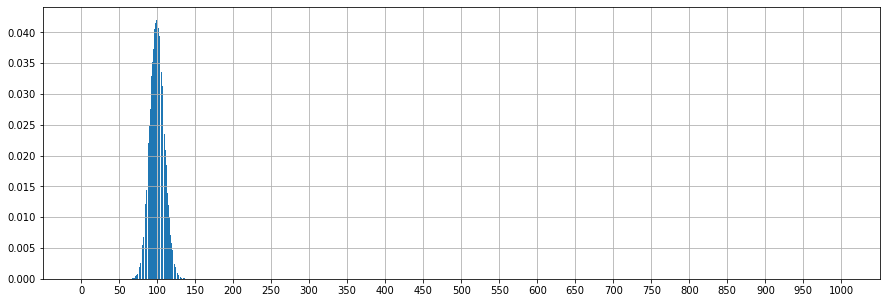

In [56]:
p = 0.1
n = 1000

distr=[]

for k in range(0, n + 1):
    current_val = st.binom.pmf(k, n, p)
    distr.append(current_val)
    
fig, ax = plt.subplots(figsize = (15, 5))
ax.grid(visible = True)
ax.bar(range(0, n + 1), distr)
plt.xticks(range(0,1001, 50))
plt.show();

Из графика понятно, что если мы хотим получить минимум 100 пользователей, которые хотят продлить подписку, то нам нужно разослать точно более 1000 бесплатных месячных подпиcок (как минимум 1050).

Попробуем найти более точное число при помощи cdf(). Если вероятность не выполнить план 5%, значит, нам необходимо найти количество промокодов, при которых мы с вероятностью 95% получим искомый результат. Чтобы получить этот результат будем вычитать из 1 результаты выполнения cdf(), т.к. cdf() возвращает вероятность получить искомые 100 пользователей или меньше.

In [54]:
n_min = 1050
p = 0.1

while True: 
    if 1 - st.binom.cdf(k=99, n=n_min, p=p) >= 0.95:
        print('Необходимое количество промокодов не менее:', n_min)
        break
    n_min += 1

Необходимое количество промокодов не менее: 1161


##### Оценить вероятность того, что push-уведомление откроют не более 399,5 тыс. пользователей.

Условия: отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. 

Необходимо с помощью аппроксимации построить примерный график распределения и оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [55]:
n = 1_000_000
p = 0.4

mu = n * p
sigma = sqrt(n * p * (1 - p))
distr = st.norm(mu, sigma) 

result = distr.cdf(399_500)
print('Вероятность того, что push-уведомление откроют не более 399,5 тыс. пользователей примерно', (result).round(3))

Вероятность того, что push-уведомление откроют не более 399,5 тыс. пользователей примерно 0.154


#### Общий вывод

##### Данные 
- пропусков в данных не обнаружено
- типы данных соответствуют предполагаемым значениям, за исключением столбца `'date'` в таблице о совершенных поездках - вместо datetime64 - object
- данные без пропусков, в записях о пользователях встретилось небольшое число полных дубликатов.
- все записи о поездках за 2021 год. 
- в данных о поездках встречаются записи с аномально коротким относительно длины поездки времени. Возможно, некорректно фиксируется конец поездки

##### Исследовательский анализ данных

- всего имеем записи о 1534 пользователях и 18068 поездках
- больше всего пользователей из Пятигорска, меньше - из Москвы
- чаще встречающийся возраст среди пользователей - 25 лет, минимальный - 12, максимальный - 43
- на графике расстояния видно две вершины около 700 м и 3000 м, вероятно есть отдельная категория пользователей, которые предпринимают относительно короткие поездки
- медианное расстояние поездки - 3133 метра, минимальное - 85 сантиметров, максимальное - 7211 метров
- среднее время поездки - 17 мин, минимальное - 6 мин, максимальное 41 мин
- есть 95 записей с аномально коротким временем поездки до 30 секунд. Однако, если посмотреть на расстояние, то становится понятно, что пользователь явно не мог проехать от 4 до 7 км за 30 секунд. Вероятно, поездка не была завершена должным образом. В то же время данные других столбцов ещё можно использовать, как и наличие самих этих записей (ведь если тариф был free, то пользователь в любом случае заплатил 50 руб.), поэтому оставим их как есть.  
- пользователей без подписки - 54%, с подпиской - 46%

##### Подсчет выручки

- общая сумма выручки 3878641 руб.
- пользователи без подписки минимально принесли выручки - 58.0 руб, в среднем - 328.64 руб, медиана - 274.0 руб, максимально - 1444.0 руб., всего 2234104 руб. или 57.7% от общего числа
- пользователи с подпиской 'ultra' минимально принесли выручки 223.0 в среднем - 362.79, медиана - 337.0 руб, максимально - 955.0 руб., всего 1644537 руб. или 42.3% от общего числа
- при этом стоит помнить, что пользователей без подписки почти вдвое больше пользователей с подпиской
- наиболее прибыльный месяц - январь, наименее прибыльный - февраль
- в эти же месяцы совершены наибольшее и наименьшее число поездок
- наиболее прибыльным оказался Пятигорск, наименее прибыльной - Москва
- распределение прибыли и поездок по месяцам выглядят несколько странно для сервиса аренды самокатов (самый прибыльный месяц - январь)

##### Проверка гипотез

###### Тратят ли пользователи с подпиской больше времени на поездки?

По результатам t-теста выявлено, что разница в средних значениях выборки пользователей с подпиской и без неслучайна и пользователи с подпиской скорее всего будут предпринимать более длительные поездки, нежели пользователи без. 

######  Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

По результатам t-теста выявлено, что вероятнее всего, за одну поездку пользователь с подпиской продет около 3130 метров.

######  Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки ?

Из результатов t-теста видим, что разница в средних значениях не случайна, поэтому можно сказать, что пользователи с подпиской в среднем приносят больше выручки, чем пользователи без подписки, несмотря на разность в количестве пользователей.

######  Какой тест вам понадобился бы для проверки гипотезы? 

Гипотеза: "Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него."

Для проверки такой гипотезы необходимо применить двухвыборочный t-тест для зависимых выборок (scipy.stats.ttest_rel)

##### Распределения

###### Выяснить, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно  5% 

При помощи биномиального распределения и кумулятивной функции распределения выявлено, что необходимое количество промокодов - не менее 1161 штук

###### Оценить вероятность того, что push-уведомление откроют не более 399,5 тыс. пользователей.

Вероятность того, что push-уведомление откроют не более 399,5 тыс. пользователей примерно 0.154


##### Рекомендации

- возможно необходимо проверить работу регистрации в сервисе или выгрузку записей  - в записях о пользователях были больные дубликаты
- возможно необходимо проверить или усовершенствовать работу фиксации окончания поездки, особенно обратить внимание на пользователей без подписки - в записях встретились записи с аномально короткими по времени, но не по расстоянию поездками 
- среди поездок выделяется группа поездок до 1500 м. И чаще такие поездки совершают пользователи без подписки. Может быть стоит рассмотреть линейку тарифных планов для таких пользователей?